<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [3]:
# type your code here
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
# import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import various functions from scipy
from scipy import stats

# import 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import StandardScaler for scaling the data
from sklearn.preprocessing import StandardScaler

# functions for forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# functions for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
# functions for  cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#from sklearn import preprocessing
from sklearn.linear_model import Ridge,Lasso,ElasticNet
import warnings


#### Load the Life expectancy dataset and display the first five records 

In [4]:
# load the csv file

# type your code here

# display the first five observations

# type your code here

df_lifeExp = pd.read_csv('Life_Expectancy.csv')
df_lifeExp.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.000000,62,0.010000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,2015,Developing,74.000000,0,4.600000,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,Algeria,2015,Developing,19.000000,21,NaN,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,2015,Developing,335.000000,66,NaN,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,Antigua,2015,Developing,13.000000,0,NaN,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,NaN,3.300000,3.300000,0.784000,13.900000,76.400000


#### Check the shape of the data and display its information

In [5]:
# check the size of the dataframe

# type your code here
df_lifeExp.shape

(182, 20)

In [6]:
# display dataset information understand the dataset

# type your code here
df_lifeExp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
df_lifeExp.Life_Expectancy.isnull().sum()

# isnull() returns the boolean output, returns True for record where null value is present
na_data = df_lifeExp.Life_Expectancy.isnull() 
# obtain a list of all records where indicating value is true 
na_data.index[na_data == True].tolist()

# drop all the records for which target variable information is missing by index
df_lifeExp = df_lifeExp.drop(df_lifeExp.index[[46, 100, 104, 111, 118, 122, 135, 138, 168]])
# find total number of missing values in column 'Life_Expectancy'
df_lifeExp.Life_Expectancy.isnull().sum()

df_lifeExp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            173 non-null    object 
 1   Year               173 non-null    int64  
 2   Status             173 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      173 non-null    int64  
 5   Alcohol            7 non-null      float64
 6   Hepatitis B        164 non-null    float64
 7   Measles            173 non-null    int64  
 8   BMI                171 non-null    float64
 9   Underfive_Deaths   173 non-null    int64  
 10  Polio              173 non-null    int64  
 11  Diphtheria         173 non-null    int64  
 12  HIV                173 non-null    float64
 13  GDP                152 non-null    float64
 14  Population         139 non-null    float64
 15  Malnourished10_19  171 non-null    float64
 16  Malnourished5_9    171 non

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

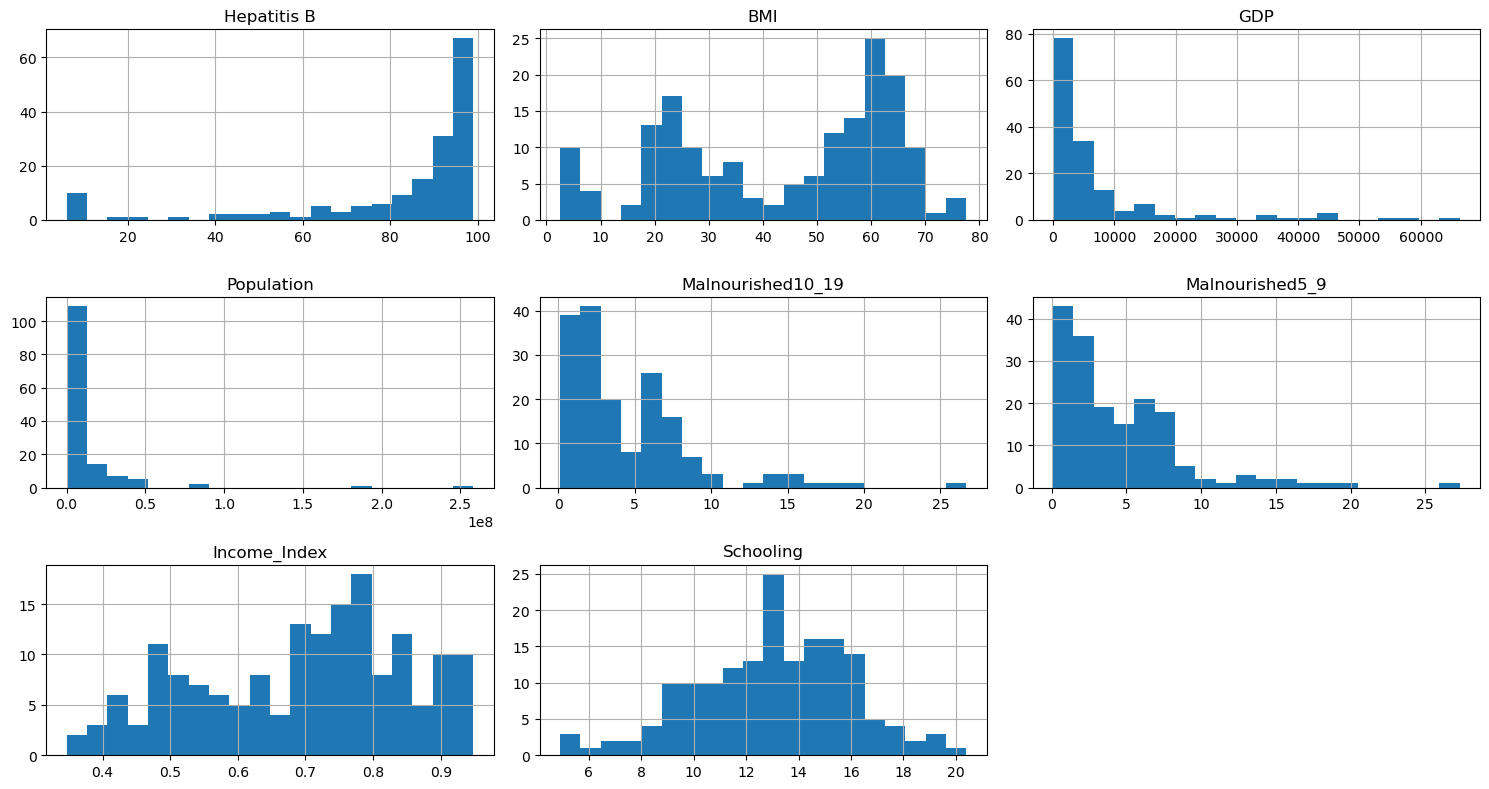

In [8]:
# type your code here
df_lifeExp.shape

Total = df_lifeExp.isnull().sum().sort_values(ascending=False)          
Percent = (df_lifeExp.isnull().sum()*100/df_lifeExp.isnull().count()).sort_values(ascending=False)  
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

df_lifeExp = df_lifeExp.drop("Alcohol",axis=1)

# extract all the variables with missing values in a new dataframe 'df_missing_values'
df_missing_values = df_lifeExp[['Hepatitis B','BMI','GDP','Population','Malnourished10_19',
                                'Malnourished5_9','Income_Index','Schooling']]
# plot histogram of all variables which have missing values
df_missing_values.hist(bins = 20, figsize = (15,8))
plt.tight_layout()
plt.show()

In [9]:
# impute skewed variables with median
df_lifeExp['GDP'] = df_lifeExp['GDP'].fillna(df_lifeExp['GDP'].median())
df_lifeExp['Hepatitis B'] = df_lifeExp['Hepatitis B'].fillna(df_lifeExp['Hepatitis B'].median())
df_lifeExp['Malnourished10_19'] = df_lifeExp['Malnourished10_19'].fillna(df_lifeExp['Malnourished10_19'].median())
df_lifeExp['Malnourished5_9'] = df_lifeExp['Malnourished5_9'].fillna(df_lifeExp['Malnourished5_9'].median())
df_lifeExp['Population'] = df_lifeExp['Population'].fillna(df_lifeExp['Population'].median())

In [10]:
# impute remaining variables with mean 
df_lifeExp['BMI'] = df_lifeExp['BMI'].fillna(df_lifeExp['BMI'].mean())
df_lifeExp['Income_Index'] = df_lifeExp['Income_Index'].fillna(df_lifeExp['Income_Index'].mean())
df_lifeExp['Schooling'] = df_lifeExp['Schooling'].fillna(df_lifeExp['Schooling'].mean())


In [11]:
# display the total number of null
df_lifeExp.isnull().sum()


Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
df_lifeExp.shape

df_lifeExp.describe(include = ['object'])

# Since all values are unique, drop the variable 'Country' from the dataframe
df_lifeExp = df_lifeExp.drop("Country",axis = 1)

# describe numerical features from dataframe
df_lifeExp.describe(include = ['int64','float64'])

# Year has low std dev so view values
df_lifeExp.Year.value_counts()

df_lifeExp = df_lifeExp.drop("Year",axis=1) 

#The variable Underfive_Deaths gives the number of deaths for age group 0-5 which includes the age group 0-1,
#hence we can eliminate the variable Infant_Deaths as it provides no new information.
df_lifeExp = df_lifeExp.drop("Infant_Deaths",axis=1)


In [13]:
df_lifeExp.shape

(173, 16)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
df_lifeExp.describe(include=['object'])
df_lifeExp['Status'] = pd.get_dummies(data = df_lifeExp['Status'], drop_first=True)
df_lifeExp.head(5)


,Status,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,1,263.000000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,1,74.000000,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,1,19.000000,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,1,335.000000,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,1,13.000000,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,2174645.000000,3.300000,3.300000,0.784000,13.900000,76.400000


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

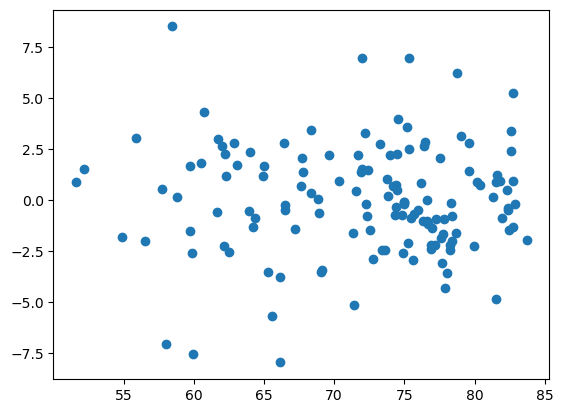

In [15]:
# type your code here
# select the independent variables
X = df_lifeExp.iloc[:,:15]
X = sm.add_constant(X)
y = df_lifeExp['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)
MLR_model = sm.OLS(y_train, X_train).fit()

y_pred = MLR_model.fittedvalues
res = MLR_model.resid
plt.scatter(x = y_pred, y = res)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
# type your code here
# select the variables describing immunization : Hepatitis B, Polio and Diphtheria
X = df_lifeExp.iloc[:,[2,6,7]]
y = df_lifeExp['Life_Expectancy']
linreg = LinearRegression()
MLR_model = linreg.fit(X, y)

y_pred = MLR_model.predict(X)
residuals = (y - y_pred)

unexplained_variation = np.sum(residuals**2)
print("The unexplained variation for the model is",unexplained_variation)

The unexplained variation for the model is 7272.4649163342965


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
# type your code here
# selecting independent variables that describe immunization
X = df_lifeExp.iloc[:,[11,12]]
y = df_lifeExp['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)
MLR_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()  
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     11.98
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           1.84e-05
Time:                        09:15:50   Log-Likelihood:                -412.68
No. Observations:                 121   AIC:                             831.4
Df Residuals:                     118   BIC:                             839.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                75.0011      1.00

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here
X=df_lifeExp.iloc[:,1].values
X=X.reshape(-1,1)
y=df_lifeExp['Life_Expectancy']
X_scaler=StandardScaler()
X=X_scaler.fit_transform(X)
y=(y-y.mean())/y.std()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [19]:
# the model using least square method
lr=LinearRegression()
MLR_model=lr.fit(X_train,y_train)
lin_pred=MLR_model.predict(X_train)

In [20]:
from sklearn.linear_model import SGDRegressor

In [21]:

sgd=SGDRegressor()
# instantiate the SGD Regressor
sgd=SGDRegressor(random_state=1)
lr_with_SGD=sgd.fit(X_train,y_train)
sgd_pred=lr_with_SGD.predict(X_train)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

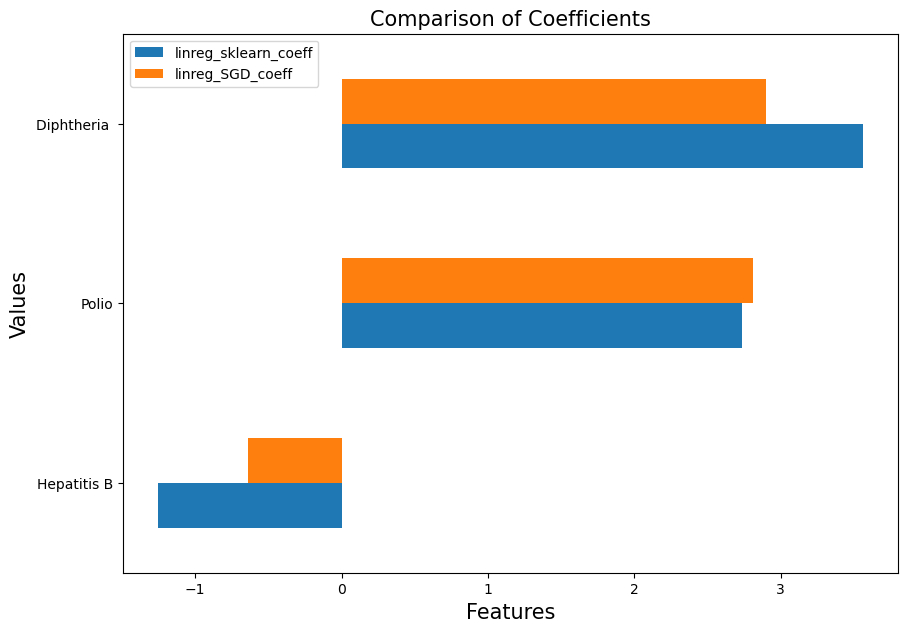

In [22]:
# type your code here
# selecting the variables describing immunization : Hepatitis B, Polio and Diphtheria
X = df_lifeExp.iloc[:,[2,6,7]]
y = df_lifeExp['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

# instantiate the SGDRegressor
sgd = SGDRegressor(random_state = 1)
linreg_with_SGD = sgd.fit(X_train, y_train)
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)

# create a dataframe of variables descibing immunization
df_immunization=df_lifeExp.iloc[:,[2,6,7]]
# create a dataframe containing the beta coefficients for the linear regression models build using sklearn and SGD 
df_coeff = pd.DataFrame([MLR_model.coef_, linreg_with_SGD.coef_], columns = df_immunization.columns, 
                 index = ['linreg_sklearn_coeff', 'linreg_SGD_coeff'])
fig = df_coeff.T.plot.barh( figsize=(10,7))
plt.title('Comparison of Coefficients', fontsize = 15)
fig.set_xlabel('Features', fontsize = 15)
fig.set_ylabel('Values', fontsize = 15)
plt.xticks(rotation = 'horizontal')
fig.legend(loc='upper left')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here
# selecting the independent variables
X = df_lifeExp.iloc[:,:15]
y = df_lifeExp['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

# initiate linear regression model
linreg = LinearRegression()
MLR_model = linreg.fit(X_train, y_train)
train_pred = MLR_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
test_pred = MLR_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

## obtain the R-squared
r_square = MLR_model.score(X_train, y_train)
# obtain the adj. R-squared
adj_r_square = 1 - ((1-r_square)*(172)/(173-16-1))
# print the R-squared and adj. R-squared values
print("The R-squared value is", r_square, "and the adjusted R-squared", adj_r_square )

Root Mean Squared Error (RMSE) on training set:  2.6569
Root Mean Squared Error (RMSE) on test set:  3.4243
The R-squared value is 0.8911156560434031 and the adjusted R-squared 0.8799480310222138


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
df_lifeExp.head(1)

,Status,Adult_Mortality,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,1,263.000000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000


Data type of target variable: float64


<AxesSubplot:>

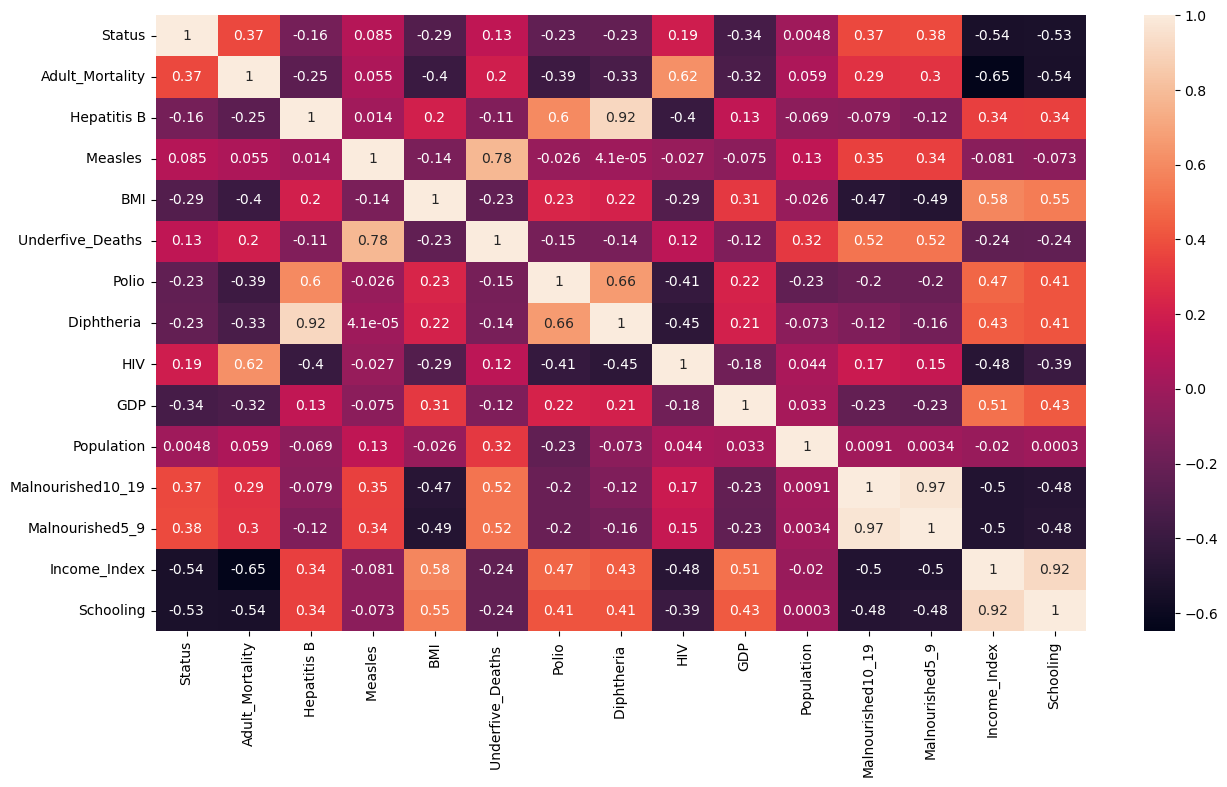

In [25]:
# type your code here
df_features=df_lifeExp.iloc[:,:15]
print("Data type of target variable:",df_lifeExp.Life_Expectancy.dtype)
plt.figure(figsize=(15,8))
sns.heatmap(df_features.corr(), annot = True, annot_kws = {"size": 10})


<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# type your code here
# Ridge can be used (**WRITE REASON**)

X = df_lifeExp.iloc[:,:15]
y = df_lifeExp['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

# use Ridge() to perform ridge regression
ridge = Ridge(alpha = 5.5)
ridge_model = ridge.fit(X_train, y_train)
# For training set:
train_pred = ridge_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
test_pred = ridge_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.3528
Root Mean Squared Error (RMSE) on test set:  0.3533


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
X = df_lifeExp.iloc[:,[3,8,2,6,7]]
X = sm.add_constant(X)
y = df_lifeExp['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)
MLR_model = sm.OLS(y_train, X_train).fit()
MLR_pvalues=MLR_model.pvalues
significant_var = MLR_pvalues[MLR_pvalues < 0.05]
significant_var.index

Index(['const', 'HIV', 'Polio'], dtype='object')

In [28]:
# type your code here
X = df_lifeExp.iloc[:,[3,8,2,6,7]]
X = sm.add_constant(X)
y = df_lifeExp['Life_Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size = 0.2)

MLR_model = sm.OLS(y_train, X_train).fit()

# calculate p-values for all the variables
MLR_pvalues = pd.DataFrame(MLR_model.pvalues, columns = ["P-Value"])
# filter the variables with p-value less than 0.05
significant_var = MLR_pvalues[MLR_pvalues['P-Value'] < 0.05]
# get significant variables using index
# to_list: converts the variables to 'list' type
signi_var = significant_var.index.to_list()
# print the list of significant variables
signi_var

['const', 'HIV', 'Polio']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
X = df_lifeExp.iloc[:,[3,8,12,11]]
y = df_lifeExp['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size = 0.2)
lasso = Lasso(alpha = 1) 
lasso_model = lasso.fit(X_train, y_train)


In [30]:
# type your code here
X = df_lifeExp.iloc[:,[3,8,12,11]]
df_features = df_lifeExp.iloc[:,[12,11,3,8]]
y = df_lifeExp['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size = 0.2)

lasso = Lasso(alpha = 1) 
lasso_model = lasso.fit(X_train, y_train)

# create a dataframe to store the variable names and corresponding coefficient values
df_lasso_coeff = pd.DataFrame(data = {'Variable': df_features.columns, 'Coefficient': lasso_model.coef_})

print('Least significant variables obtained from Lasso Regression when alpha is 1:',
      df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list())


Least significant variables obtained from Lasso Regression when alpha is 1: ['Malnourished5_9', 'Malnourished10_19', 'Measles ', 'HIV']


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
# type your code here
X = df_lifeExp.iloc[:,:15]
y = df_lifeExp['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

enet = ElasticNet(alpha = 0.1, l1_ratio = 0.0001) 
enet_model = enet.fit(X_train, y_train)

# predict the values of target variable using test data
y_test_pred = enet_model.predict(X_test)
train_pred = enet_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
    
# For testing set:
test_pred = enet_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)


Root Mean Squared Error (RMSE) on training set:  0.3581
Root Mean Squared Error (RMSE) on test set:  0.3544


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [32]:
# type your code here
X = df_lifeExp.iloc[:,:15]
df_features=df_lifeExp.iloc[:,:15]
y = df_lifeExp['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)
lasso = Lasso(alpha = 0.5) 
lasso_model = lasso.fit(X_train, y_train)
df_lasso_coeff = pd.DataFrame(data = {'Variable': df_features.columns, 'Coefficient': lasso_model.coef_})
print('Least significant variables obtained from Lasso Regression when alpha is 1:',
      df_lasso_coeff.Variable[df_lasso_coeff.Coefficient != 0].to_list())

Least significant variables obtained from Lasso Regression when alpha is 1: ['Adult_Mortality', 'Income_Index']


<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
X = df_lifeExp.iloc[:,:15]
y = df_lifeExp['Life_Expectancy']
X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)

tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11]}]
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 5)
ridge_grid.fit(X_train, y_train)
print('Best parameters for Ridge Regression:', ridge_grid.best_params_)

Best parameters for Ridge Regression: {'alpha': 11}


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
param={'alpha':[7,8,9,10,11]}
model=Ridge()
grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=5,scoring='r2')
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

{'alpha': 11}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here
from sklearn.model_selection import GridSearchCV
X = df_lifeExp.iloc[:,[12,11,3,8]]
y = df_lifeExp['Life_Expectancy']

X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, test_size = 0.2)

tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)
enet_grid.fit(X_train, y_train)
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')

Best parameters for ELastic-net Regression:  {'alpha': 0.1, 'l1_ratio': 0.9} 



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
X = df_lifeExp.iloc[:,:15]
y = df_lifeExp['Life_Expectancy']

X_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = (y - y.mean()) / y.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=110, test_size = 0.2)


tuned_paramaters = [{'l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]

enet = ElasticNet(alpha=0.8)

enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_train, y_train)
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

Best parameters for Elastic Net Regression:  {'l1_ratio': 0.005} 

